<center> <h1> Introduction to Pandas </h1> </center>

## Why use pandas? 

pandas are a way for us to organize our data in a table like format. This lets us easily manipulate and transform data in rows and columns. </br>

For those of you familiar with **R**, pandas bring many of the utilites of DataFrames in **R**, to python and offer many more ways of acting on the data. 
</br>
<br/>
<br/>
For those not familiar with **R**, Pandas allows us to load data into memory and organize it in a table for with rows and columns to manipulate like a sql table or excel worksheet. 

## Import libraries 

In [193]:
import pandas as pd #short hand for pandas library 
import numpy as np # library for math! matrices etc. 
import matplotlib.pyplot as plt #plotting library

%matplotlib inline  

## load some data

This is a dataset from Seattle Airbnb Open Data
Link: https://www.kaggle.com/airbnb/seattle


In [194]:
data = pd.read_csv("listings.csv") #file is in same folder so no path is required

## Lets take a look

In [195]:
data.head() # look at first 5 rows

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [196]:
#Whoa! there are alot of columns there, lets look at a list of them.
list(data.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


## Keep the few columns that we want
We're interested in how bedrooms and bathrooms affect price of a unit.

**df.loc : **Purely label-location based indexer for selection by label.

df.loc[ *rows* , *columns*]

Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html

In [197]:
data = data.loc[:,['price','bedrooms','bathrooms']] # all the rows, with three columns

In [198]:
data.head()

,price,bedrooms,bathrooms
0,$85.00,1.0,1.0
1,$150.00,1.0,1.0
2,$975.00,5.0,4.5
3,$100.00,0.0,1.0
4,$450.00,3.0,2.0


## Check for NaN values 

**isnull:** https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html

Checking for nan values is an important step.  

In [48]:
## data.isnull().head() #this will return T/F if there is a null value 

,price,bedrooms,bathrooms
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [72]:
nan_rows = data[data.isnull().T.any().T] # handy way to return the NaN values
nan_rows #return the rows with NaN values



,price,bedrooms,bathrooms


In [55]:
# how many rows do we have? 
data.shape #rows , columns

(3818, 3)

## Lets drop these rows

In [57]:
data = data.dropna() #re- assign 'data' DataFrame with values after droping NaN values

In [58]:
#Check out the shape after droping values
data.shape 

(3796, 3)

## Lets explore 'bathrooms'

In [59]:
data.dtypes

price         object
bedrooms     float64
bathrooms    float64
dtype: object

In [60]:
data['bathrooms'].min() # What is the min value for this column?

0.0

In [61]:
data['bathrooms'].max() # What is the max value for this column? 

8.0

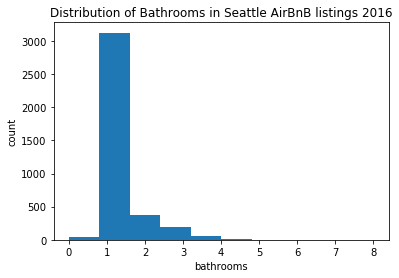

In [71]:
# Lets make a histogram
plt.hist(data['bathrooms'], align ='mid') 
plt.xlabel('bathrooms')
plt.ylabel('count')
plt.title('Distribution of Bathrooms in Seattle AirBnB listings 2016')


## Exercise: Make a histogram for bedrooms

In [ ]:
plt.hist() #prompt

## Lets make some plots 

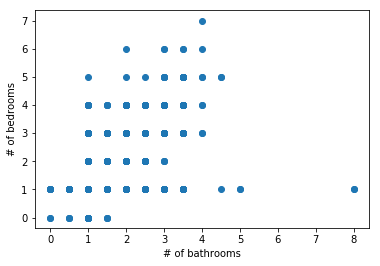

In [84]:
#Lets plot bathrooms against bedrooms
plt.scatter(data.bathrooms, data.bedrooms)
plt.xlabel('# of bathrooms')
plt.ylabel('# of bedrooms')


## What about price? 

In [ ]:
#lets make a scatter plot of bedrooms (x) and price (y)
plt.scatter(data.bedrooms, data.price)

## Oops! An error! - Lets Investigate 
If you scroll down to the bottom of the traceback we see: <br/> 
**ValueError: could not convert string to float: $87.00**
<br/>
<br/>
Often, data will be in the wrong data format and we need to convert it. 
In this case, 'price' is a string. to preform mathmatic operations we need it to be a integer or a floating point value. 


In [94]:
data.dtypes # what are the datatypes of the DataFrame anyway? 

price         object
bedrooms     float64
bathrooms    float64
dtype: object

In [101]:
#We see that price is an object and that bedrooms and bathrooms are both floats
#lets look at the first value of 'price'
data['price'][0] #python is 0 indexed so, 0 is the 1st value! 

'$85.00'

In the statement above, we indicated the DataFrame, the column and the value <br>
<br>
syntax: df[*'column'*][*value*] 

In [102]:
# lets check the type of this value to verify it is a string
type(data['price'][0])

str

In [103]:
df = data.copy() #Lets make a copy to manipulate 

## The '$' is a redflag!   How do we get rid of it? 

In [115]:
df['price'] = df['price'].str.replace('$','').str.replace(',','') #replace'$',',' with nothing


In [116]:
df.head()

,price,bedrooms,bathrooms
0,85.00,1.0,1.0
1,150.00,1.0,1.0
2,975.00,5.0,4.5
3,100.00,0.0,1.0
4,450.00,3.0,2.0


In [117]:
#Check type 
type(df.price[0]) #still a string

str

In [199]:
df.price[0]

85.0

In [119]:
#now that we have a string of only numbers, we can convert it to a numerical data type, float. 
df['price'] = df.price.astype(float)

In [120]:
# Check that we now have float values!
type(df.price[0])

numpy.float64

## Finally we can plot! 

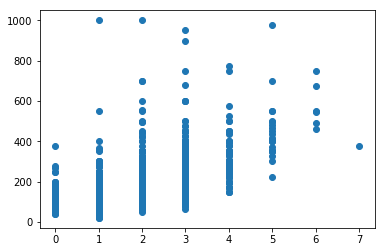

In [121]:
plt.scatter(df.bedrooms,df.price)

## lets find a line of best fit to help us model the relationship. 
documentation: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

In [174]:
# Lets fit a line to this!
from sklearn import linear_model

In [175]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [180]:
# Lets split our data

X = df.bedrooms[:, np.newaxis] #little magic! 
y = df.price.astype(int)

X_train = X[:-2000] #we'll assign the last 1000 bedroom observations as our training set
X_test = X[1000:]


In [170]:
# our targets (Y values)
Y_train = y[:-2000] #we'll assign the last 2000 price observations as our training set
Y_test = y[1000:]


In [181]:
# Train the model using the training sets
regr.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## return the coefficents 

In [200]:
# The coefficients
print('Coefficients:', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - Y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, Y_test))

('Coefficients:', array([ 66.81369992]))
Mean squared error: 5216.08
Variance score: 0.30


## What does a coefficent of 66.813 suggest? 

**Answer:** for each additional bathroom in an Airbnb unit, the price increases by $66.813 <br>
However, we see deminishing returns. 

## 30% of the variance in price is affected by the number of Bathrooms

perhaps a non-linear model would be better (Another tutorial!) 

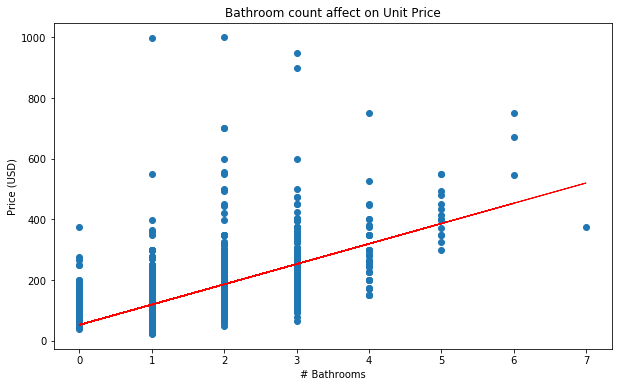

In [201]:
# Plot outputs

plt.figure(figsize=(10,6))
plt.scatter(X_test, Y_test)
plt.plot(X_test, regr.predict(X_test), color='red',
         linewidth=1)

plt.title('Bathroom count affect on Unit Price')
plt.ylabel('Price (USD)')
plt.xlabel('# Bathrooms')


plt.show()